In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [7]:
stock=pd.read_csv('stock.csv')

In [8]:
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
stock.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


Text(0, 0.5, 'Close')

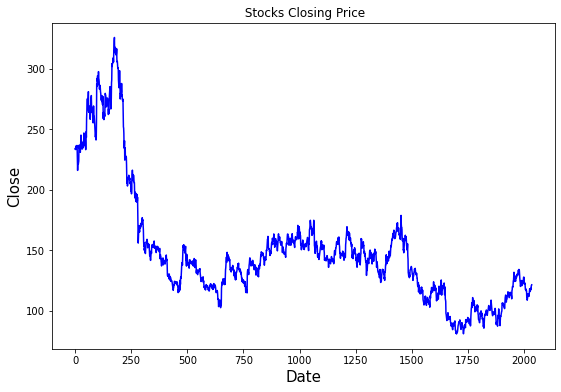

In [11]:
fif,ax=plt.subplots(figsize = (9,6))
plt.title(' Stocks Closing Price')
plt.plot(stock['Close'],'b')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close',fontsize=15)

In [12]:
smp=stock.reset_index()['Close']

In [13]:
smp

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

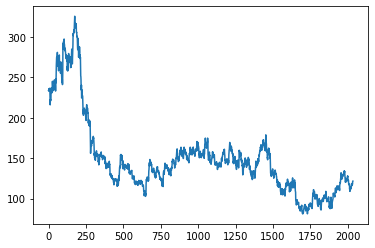

In [14]:
import matplotlib.pyplot as plt
plt.plot(smp)

In [ ]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
smp=scaler.fit_transform(np.array(smp).reshape(-1,1))

In [16]:
print(smp)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [ ]:
#splitting the data set into train and test sets


In [17]:
training_size=int(len(smp)*0.65)
test_size=len(smp)-training_size
train_data,test_data=smp[0:training_size,:],smp[training_size:len(smp),:1]

In [18]:
training_size,test_size

(1322, 713)

In [19]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(1, 100)
(1,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(1, 100)
(1,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 15s 15s/step - loss: 0.8437 - val_loss: 0.0887
Epoch 2/100
1/1 [==============================] - 0s 284ms/step - loss: 0.6970 - val_loss: 0.0638
Epoch 3/100
1/1 [==============================] - 0s 278ms/step - loss: 0.5658 - val_loss: 0.0416
Epoch 4/100
1/1 [==============================] - 0s 274ms/step - loss: 0.4390 - val_loss: 0.0219
Epoch 5/100
1/1 [==============================] - 0s 281ms/step - loss: 0.3115 - val_loss: 0.0064
Epoch 6/100
1/1 [==============================] - 0s 267ms/step - loss: 0.1841 - val_loss: 4.2361e-05
Epoch 7/100
1/1 [==============================] - 0s 275ms/step - loss: 0.0691 - val_loss: 0.0142
Epoch 8/100
1/1 [==============================] - 0s 288ms/step - loss: 0.0021 - val_loss: 0.0652
Epoch 9/100
1/1 [==============================] - 0s 300ms/step - loss: 0.0432 - val_loss: 0.1130
Epoch 10/100
1/1 [==============================] - 0s 277ms/step - loss: 0.1110 - val_loss: 0.1137
Epoch 

1/1 [==============================] - 0s 284ms/step - loss: 2.0894e-05 - val_loss: 0.0627
Epoch 82/100
1/1 [==============================] - 0s 307ms/step - loss: 4.6698e-06 - val_loss: 0.0635
Epoch 83/100
1/1 [==============================] - 0s 283ms/step - loss: 7.9082e-08 - val_loss: 0.0643
Epoch 84/100
1/1 [==============================] - 0s 283ms/step - loss: 6.0701e-06 - val_loss: 0.0649
Epoch 85/100
1/1 [==============================] - 0s 299ms/step - loss: 1.7192e-05 - val_loss: 0.0653
Epoch 86/100
1/1 [==============================] - 0s 274ms/step - loss: 2.6707e-05 - val_loss: 0.0654
Epoch 87/100
1/1 [==============================] - 0s 268ms/step - loss: 2.9817e-05 - val_loss: 0.0653
Epoch 88/100
1/1 [==============================] - 0s 268ms/step - loss: 2.5530e-05 - val_loss: 0.0649
Epoch 89/100
1/1 [==============================] - 0s 292ms/step - loss: 1.6471e-05 - val_loss: 0.0644
Epoch 90/100
1/1 [==============================] - 0s 297ms/step - loss: 7.0

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 81ms/step


In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

293.5056507384855

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

221.45504331900403

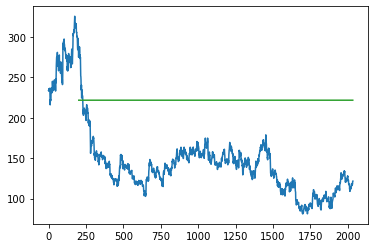

In [35]:
### Visualise the Predictions
look_back = 100
train_num_pyredict_plot = np.empty_like(smp)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(smp)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(smp) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(smp))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()

In [37]:
### Future Prediction Model
x_inum_pyut=test_data[307:].reshape(1, -1)
x_inum_pyut.shape
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()

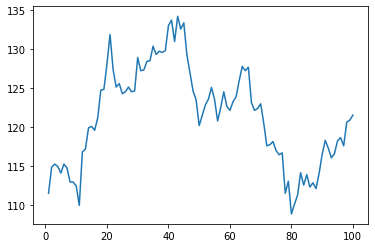

In [39]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
plt.plot(day_new, scaler.inverse_transform(smp[1935 : ]))